<a href="https://colab.research.google.com/github/woodskd24/MS-Data-Science/blob/main/alcoholSuicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Death = pd.read_csv("/content/LeadingCauseDeath.csv")
Death

,Year,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [ ]:
Death.describe()

,Year,Deaths,Age-adjustedDeathRate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [ ]:
Death.corr()

,Year,Deaths,Age-adjustedDeathRate
Year,1.000000,0.004417,-0.038853
Deaths,0.004417,1.000000,0.231048
Age-adjustedDeathRate,-0.038853,0.231048,1.000000


In [ ]:
Death.cov()

,Year,Deaths,Age-adjustedDeathRate
Year,30.002761,2.731198e+03,-4.759414e+01
Deaths,2731.197939,1.274100e+10,5.832474e+06
Age-adjustedDeathRate,-47.594138,5.832474e+06,5.001475e+04


In [ ]:
Death2016 = Death[Death['Year'] == 2016]
Suicide = Death2016[Death2016['CauseName'] == 'Suicide']

In [ ]:
RegionMap=pd.read_csv("/content/states.csv")

In [ ]:
SuicideRegion = Suicide.merge(RegionMap, on=['State'])

In [ ]:
SuicideRegion.describe()

,Year,Deaths,Age-adjustedDeathRate
count,51.0,51.000000,51.000000
mean,2016.0,881.666667,15.584314
std,0.0,852.110314,4.695333
min,2016.0,40.000000,5.200000
25%,2016.0,309.000000,12.850000
50%,2016.0,677.000000,14.900000
75%,2016.0,1153.500000,18.300000
max,2016.0,4294.000000,25.900000


In [ ]:
SuicideRegion.corr()

,Year,Deaths,Age-adjustedDeathRate
Year,NaN,NaN,NaN
Deaths,NaN,1.000000,-0.266776
Age-adjustedDeathRate,NaN,-0.266776,1.000000


In [ ]:
SuicideRegion.cov()

,Year,Deaths,Age-adjustedDeathRate
Year,0.0,0.000000,0.000000
Deaths,0.0,726091.986667,-1067.353333
Age-adjustedDeathRate,0.0,-1067.353333,22.046149


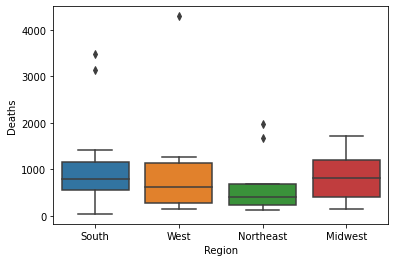

In [ ]:
sns.boxplot(x="Region", y='Deaths', data=SuicideRegion)

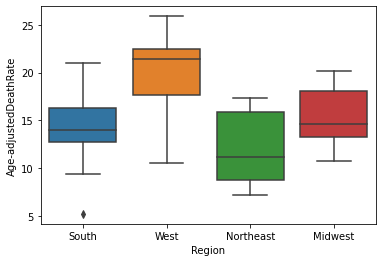

In [ ]:
sns.boxplot(x="Region", y='Age-adjustedDeathRate', data=SuicideRegion)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


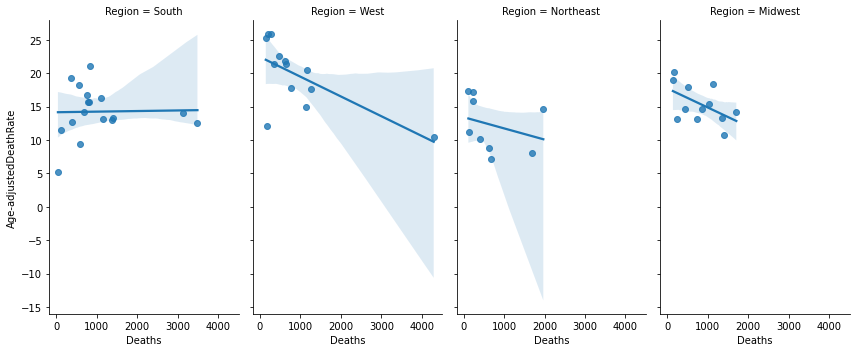

In [ ]:
r = sns.lmplot(x = 'Deaths', y='Age-adjustedDeathRate',data=SuicideRegion, col='Region', aspect=0.6, size=5)

In [ ]:
options = ['MA', 'NH', 'RI', 'VT', 'ME', 'CT'] 
   
# selecting rows based on condition 
NewEngland = SuicideRegion.loc[SuicideRegion['State Code'].isin(options)] 
NewEngland

,Year,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate,State Code,Region,Division
6,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Connecticut,397,10.1,CT,Northeast,New England
19,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Maine,226,15.9,ME,Northeast,New England
21,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Massachusetts,631,8.8,MA,Northeast,New England
29,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,New Hampshire,244,17.2,NH,Northeast,New England
39,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Rhode Island,126,11.2,RI,Northeast,New England
45,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Vermont,118,17.3,VT,Northeast,New England


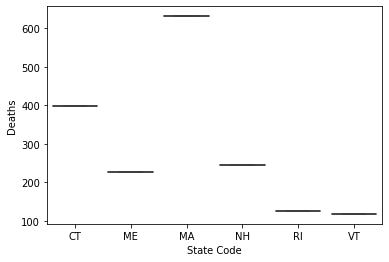

In [ ]:
sns.boxplot(x = "State Code", y = "Deaths", data=NewEngland)

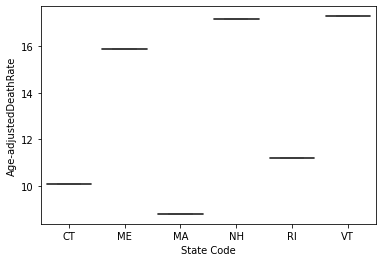

In [ ]:
sns.boxplot(x = "State Code", y = 'Age-adjustedDeathRate', data=NewEngland)

In [ ]:
Pop = pd.read_csv("/content/Pop.csv")

In [ ]:
SuicidePop = SuicideRegion.merge(Pop, on=['State'])
SuicidePop

,Year,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate,State Code,Region,Division,GEO.id,GEO.id2,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,Pop2016
0,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,1,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alaska,193,25.8,AK,West,Pacific,0400000US02,2,710231,710249,714031,722713,731089,736879,736705,737709,741894
2,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Arizona,1271,17.7,AZ,West,Mountain,0400000US04,4,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071
3,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Arkansas,555,18.2,AR,South,West South Central,0400000US05,5,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248
4,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,California,4294,10.5,CA,West,Pacific,0400000US06,6,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
5,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Colorado,1168,20.5,CO,West,Mountain,0400000US08,8,5029196,5029324,5048644,5118360,5189867,5267603,5349648,5448819,5540545
6,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Connecticut,397,10.1,CT,Northeast,New England,0400000US09,9,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452
7,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Delaware,119,11.5,DE,South,South Atlantic,0400000US10,10,897934,897936,899816,907924,916993,925395,934948,944076,952065
8,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,40,5.2,DC,South,South Atlantic,0400000US11,11,601723,601766,605183,620477,635327,649165,659005,670377,681170
9,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Florida,3143,14.0,FL,South,South Atlantic,0400000US12,12,18801310,18804592,18849098,19096952,19344156,19582022,19888741,20244914,20612439


In [ ]:
SuicidePop['DeathbyPop'] = SuicidePop['Deaths']/SuicidePop['Pop2016']
SuicidePop

,Year,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate,State Code,Region,Division,GEO.id,...,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,Pop2016,DeathbyPop
0,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,0.000162
1,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alaska,193,25.8,AK,West,Pacific,0400000US02,...,710231,710249,714031,722713,731089,736879,736705,737709,741894,0.000260
2,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Arizona,1271,17.7,AZ,West,Mountain,0400000US04,...,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,0.000183
3,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Arkansas,555,18.2,AR,South,West South Central,0400000US05,...,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,0.000186
4,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,California,4294,10.5,CA,West,Pacific,0400000US06,...,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,0.000109
5,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Colorado,1168,20.5,CO,West,Mountain,0400000US08,...,5029196,5029324,5048644,5118360,5189867,5267603,5349648,5448819,5540545,0.000211
6,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Connecticut,397,10.1,CT,Northeast,New England,0400000US09,...,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452,0.000111
7,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Delaware,119,11.5,DE,South,South Atlantic,0400000US10,...,897934,897936,899816,907924,916993,925395,934948,944076,952065,0.000125
8,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,40,5.2,DC,South,South Atlantic,0400000US11,...,601723,601766,605183,620477,635327,649165,659005,670377,681170,0.000059
9,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Florida,3143,14.0,FL,South,South Atlantic,0400000US12,...,18801310,18804592,18849098,19096952,19344156,19582022,19888741,20244914,20612439,0.000152


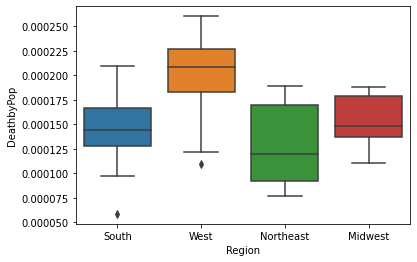

In [ ]:
sns.boxplot(x="Region", y="DeathbyPop", data=SuicidePop)

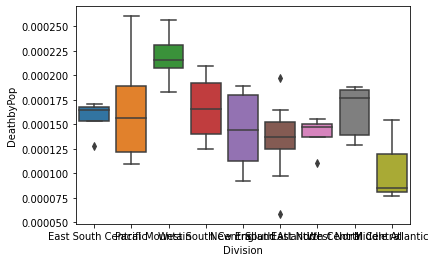

In [ ]:
sns.boxplot(x="Division", y="DeathbyPop", data=SuicidePop)

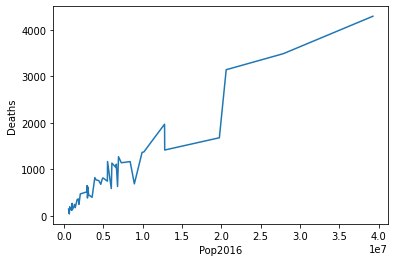

In [ ]:
sns.lineplot(data=SuicidePop, x="Pop2016", y="Deaths")

In [ ]:
options = ['MA', 'NH', 'RI', 'VT', 'CT', 'CA', 'AK'] 
   
# selecting rows based on condition 
Discovery = SuicidePop.loc[SuicideRegion['State Code'].isin(options)] 
Discovery

,Year,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate,State Code,Region,Division,GEO.id,...,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,Pop2016,DeathbyPop
1,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alaska,193,25.8,AK,West,Pacific,0400000US02,...,710231,710249,714031,722713,731089,736879,736705,737709,741894,0.000260
4,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,California,4294,10.5,CA,West,Pacific,0400000US06,...,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,0.000109
6,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Connecticut,397,10.1,CT,Northeast,New England,0400000US09,...,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452,0.000111
21,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Massachusetts,631,8.8,MA,Northeast,New England,0400000US25,...,6547629,6547813,6565524,6611923,6658008,6706786,6749911,6784240,6811779,0.000093
29,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,New Hampshire,244,17.2,NH,Northeast,New England,0400000US33,...,1316470,1316461,1316872,1318473,1321182,1322687,1328743,1330111,1334795,0.000183
39,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Rhode Island,126,11.2,RI,Northeast,New England,0400000US44,...,1052567,1052940,1053337,1052451,1052901,1053033,1054480,1055607,1056426,0.000119
45,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Vermont,118,17.3,VT,Northeast,New England,0400000US50,...,625741,625741,625982,626730,626444,627140,626984,626088,624594,0.000189


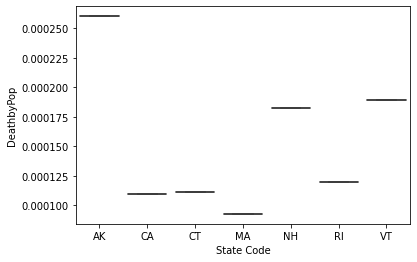

In [ ]:
sns.boxplot(x="State Code", y="DeathbyPop", data=Discovery)

In [ ]:
Alcohol = pd.read_csv("/content/Alcohol.csv")
AlcoholSuicide = SuicidePop.merge(Alcohol, on=['State'])

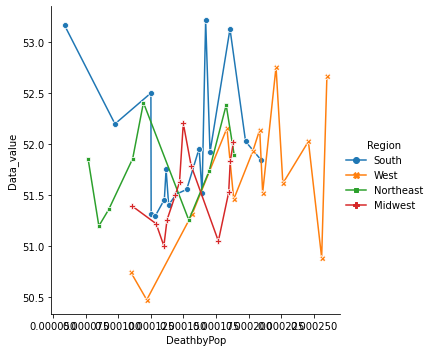

In [ ]:
sns.relplot(x="DeathbyPop", y="Data_value", 
            data=AlcoholSuicide, kind="line", ci=None, style="Region", hue="Region",
            markers=True, dashes=False);

In [ ]:
AlcoholSuicide['AlcoholPop'] = AlcoholSuicide['Data_value']/AlcoholSuicide['Pop2016']
AlcoholSuicide

,Year_x,CauseName113,CauseName,State,Deaths,Age-adjustedDeathRate,State Code,Region,Division,GEO.id,...,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation,AlcoholbySuicidebyPop,AlcoholPop
0,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,CLASS01,TOPIC07,1,RACE02,CAT4,_RFBING5,RESP046,"(32.84057112200048, -86.63186076199969)",0.001975,0.000003
1,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,CLASS01,TOPIC30,1,EDUCA2,CAT5,_RFDRHV7,RESP206,"(32.84057112200048, -86.63186076199969)",0.000959,0.000001
2,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,CLASS01,TOPIC07,1,RACE08,CAT4,_RFBING5,RESP054,"(32.84057112200048, -86.63186076199969)",0.014686,0.000019
3,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,CLASS01,TOPIC03,1,AGE01,CAT3,DRNKANY5,RESP046,"(32.84057112200048, -86.63186076199969)",0.007230,0.000009
4,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7,AL,South,East South Central,0400000US01,...,CLASS01,TOPIC07,1,EDUCA4,CAT5,_RFBING5,RESP054,"(32.84057112200048, -86.63186076199969)",0.013854,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75722,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Wyoming,144,25.2,WY,West,Mountain,0400000US56,...,CLASS01,TOPIC03,56,RACE07,CAT4,DRNKANY5,RESP046,"(43.23554134300048, -108.10983035299967)",0.015098,0.000105
75723,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Wyoming,144,25.2,WY,West,Mountain,0400000US56,...,CLASS01,TOPIC07,56,INCOME3,CAT6,_RFBING5,RESP046,"(43.23554134300048, -108.10983035299967)",0.003111,0.000022
75724,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Wyoming,144,25.2,WY,West,Mountain,0400000US56,...,CLASS01,TOPIC30,56,RACE06,CAT4,_RFDRHV7,RESP206,"(43.23554134300048, -108.10983035299967)",NaN,NaN
75725,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Wyoming,144,25.2,WY,West,Mountain,0400000US56,...,CLASS01,TOPIC30,56,EDUCA4,CAT5,_RFDRHV7,RESP205,"(43.23554134300048, -108.10983035299967)",0.022964,0.000159


In [ ]:
AlcoholSuicide['AlcoholbySuicidebyPop'] = AlcoholSuicide['AlcoholPop']/AlcoholSuicide['DeathbyPop']

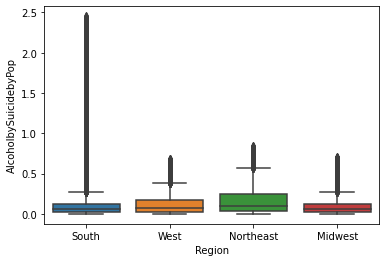

In [ ]:
sns.boxplot(x="Region", y="AlcoholbySuicidebyPop", data=AlcoholSuicide)

In [ ]:
import statsmodels.formula.api as smf
model = smf.logit("DeathbyPop ~ Data_value + Region", data = AlcoholSuicide).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.000159
         Iterations 13


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DeathbyPop   No. Observations:                68033
Model:                          Logit   Df Residuals:                    68028
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Sep 2022   Pseudo R-squ.:                     inf
Time:                        22:45:22   Log-Likelihood:                -10.821
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.7850      0.802    -10.949      0.000     -10.358      -7.212
Region[T.Northeast]    -0.1611      1.025     -0.157      0.875      -2.171       1.848
Region[T.South]        -0.0432      0.840     -0.051      0.959      -1.689       1.603
Region[T.West]          0.2553      0.833      0.307      0.759      -1.377       1.888
Data_value            3.76e-05      0.010      0.004      0.997      -0.019       0.019
=======================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""